In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
processed_Data_Folder = Path.cwd().joinpath('processed')
df_FallAllD = pd.read_pickle(processed_Data_Folder.joinpath('FallAllD-Preliminary.pkl'))
df_SisFall = pd.read_pickle(processed_Data_Folder.joinpath('SisFall-Preliminary.pkl'))
df_UMAFall = pd.read_pickle(processed_Data_Folder.joinpath('UMAFall-Preliminary.pkl'))

In [3]:
dataset = ('FallAllD', 'SisFall', 'UMAFall')
motion_counts = {
    'Fall': np.array([
        df_FallAllD[df_FallAllD['Activity'] == 'Fall'].shape[0], 
        df_SisFall[df_SisFall['Activity'] == 'Fall'].shape[0], 
        df_UMAFall[df_UMAFall['Activity'] == 'Fall'].shape[0]]),
    'ADL': np.array([
        df_FallAllD[df_FallAllD['Activity'] == 'ADL'].shape[0], 
        df_SisFall[df_SisFall['Activity'] == 'ADL'].shape[0], 
        df_UMAFall[df_UMAFall['Activity'] == 'ADL'].shape[0]]),
}
subject_counts = (
    df_FallAllD['SubjectID'].nunique(),
    df_SisFall['SubjectID'].nunique(),
    df_UMAFall['SubjectID'].nunique()
)
dataset_counts = (df_FallAllD.shape[0], df_SisFall.shape[0], df_UMAFall.shape[0])

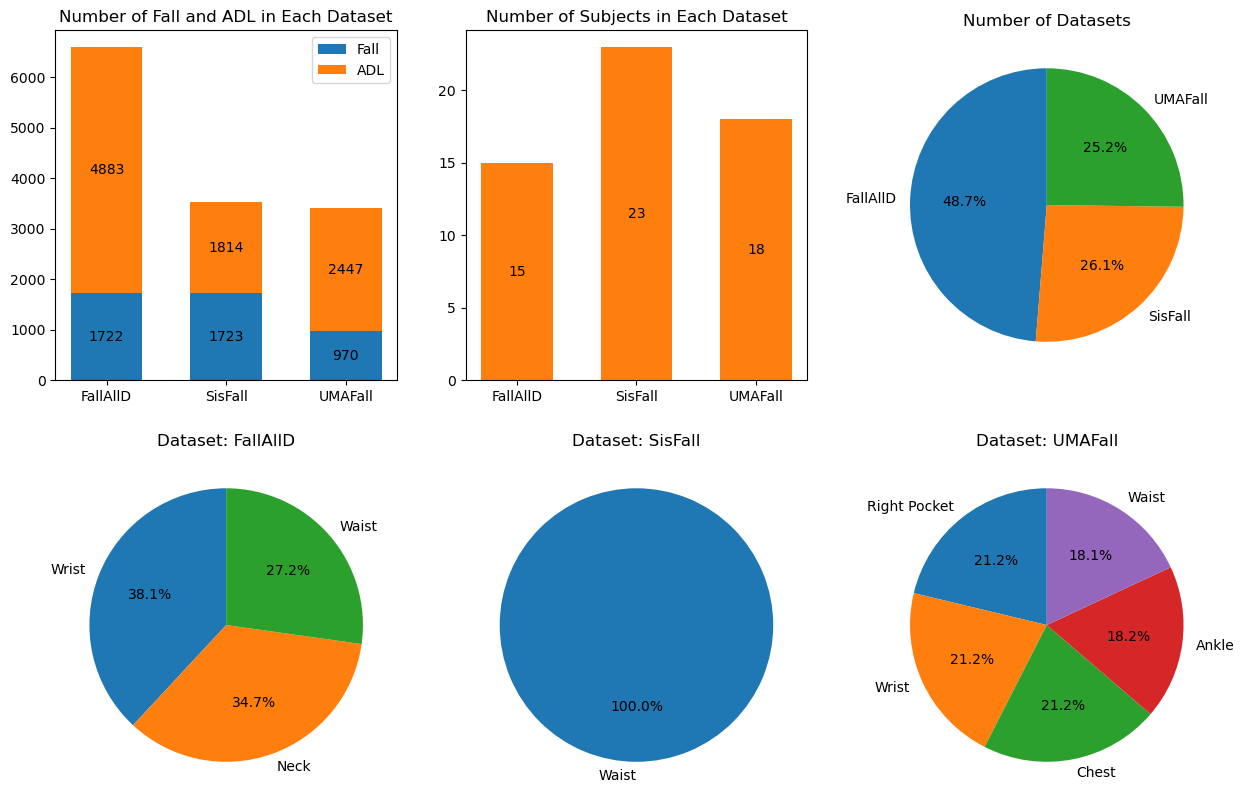

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
bottom = np.zeros(3)

for motion, motion_count in motion_counts.items():
    p1 = ax[0, 0].bar(dataset, motion_count, width=0.6, label=motion, bottom=bottom)
    bottom += motion_count
    ax[0, 0].bar_label(p1, label_type='center')

ax[0, 0].set_title('Number of Fall and ADL in Each Dataset')
ax[0, 0].legend()

for i, df in enumerate([df_FallAllD, df_SisFall, df_UMAFall]):
    ax[1, i].set_title(f"Dataset: {dataset[i]}")
    df['Device'].value_counts().plot(kind='pie', ax=ax[1, i], autopct='%1.1f%%', startangle=90)
    ax[1, i].get_yaxis().set_visible(False)

p2 = ax[0, 1].bar(dataset, subject_counts, width=0.6, color='#ff7f0e')
ax[0, 1].bar_label(p2, label_type='center')
ax[0, 1].set_title('Number of Subjects in Each Dataset')

ax[0, 2].pie(dataset_counts, labels=dataset, autopct='%1.1f%%', startangle=90)
ax[0, 2].set_title('Number of Datasets')

plt.show()